In [1]:
import pandas as pd

In [2]:
carpetas_investigacion = pd.read_csv('carpetas-de-investigacion-pgj-cdmx.csv', sep = ';') #leemos los datos

# Rápida exploración de datos

### Para asegurar la calidad de los datos verificaría cuántos y cuáles campos tienen datos faltantes, la consistencia de la notacion (es decir que el valor de las variables esté escrito siempre de la misma manera, que todos los valores se presenten en mayusculas o minusculas, cuidado con los acentos), que los valores que toman las variables sean válidos (ej: que  la variable estado no tome valores como Col. escuadron), que las coordenadas tengan sentido.

In [3]:
carpetas_investigacion.columns #vemos las columnas de la tabla

Index(['Año', 'Mes', 'Alcaldía', 'Categoría de delito', 'Delito', 'Agencia',
       'Unidad de investigación', 'Fecha inicio', 'Fiscalía', 'Calle1',
       'Calle2', 'Colonia', 'Latitud', 'Longitud', 'Mes y año', 'Geopoint'],
      dtype='object')

In [4]:
carpetas_investigacion.dtypes #los tipos de datos en cada columna (casi todos son object)

Año                          int64
Mes                         object
Alcaldía                    object
Categoría de delito         object
Delito                      object
Agencia                     object
Unidad de investigación     object
Fecha inicio                object
Fiscalía                    object
Calle1                      object
Calle2                      object
Colonia                     object
Latitud                    float64
Longitud                   float64
Mes y año                   object
Geopoint                    object
dtype: object

In [5]:
carpetas_investigacion.shape #las dimensiones de la tabla (numero de observaciones,numero de columnas)

(702922, 16)

In [6]:
#aqui podemos observa que en la columna mes y Año tiene dos datos, sería más conveniente tenerlos por separado y 
#en tipo int . De igual manera con la Fecha de inicio, tiene tres datos juntos. 
carpetas_investigacion.head(3)

,Año,Mes,Alcaldía,Categoría de delito,Delito,Agencia,Unidad de investigación,Fecha inicio,Fiscalía,Calle1,Calle2,Colonia,Latitud,Longitud,Mes y año,Geopoint
0,2016,Mayo,CUAUHTEMOC,HECHO NO DELICTIVO,DENUNCIA DE HECHOS,FDS-6,T3,2016-05-01 00:55:30,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,CASA HABITACION,VERTIZ 1329 DEPTO 7,DOCTORES,19.419659,-99.147374,2016-05,"19.4196589998, -99.147374"
1,2016,Mayo,ALVARO OBREGON,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,AO-4,T3,2016-05-01 01:26:31,INVESTIGACIÓN EN ÁLVARO OBREGÓN,5 DE MAYO (DATOS REPORTE 74),GUADALUPE HIDALGO (DATOS REPORTE 74),MERCED GÓMEZ,19.365347,-99.204310,2016-05,"19.3653469998, -99.20431"
2,2016,Mayo,ALVARO OBREGON,DELITO DE BAJO IMPACTO,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,AO-3,UI-3CD,2016-05-01 01:44:36,INVESTIGACIÓN EN ÁLVARO OBREGÓN,PROLONGACION ROSA BLANCA Y CALLE CENTRAL,NaN,ALFONSO XIII,19.375611,-99.199248,2016-05,"19.3756109998, -99.199248"


In [7]:
carpetas_investigacion.Año.min(), carpetas_investigacion.Año.max() #periodo comprendido entre años

(2016, 2019)

In [8]:
carpetas_investigacion[carpetas_investigacion['Año'] == 2016].Mes.unique() #verificar desde que mes del 2016

array(['Mayo', 'Enero', 'Noviembre', 'Abril', 'Febrero', 'Diciembre',
       'Marzo', 'Septiembre', 'Octubre', 'Julio', 'Agosto', 'Junio'],
      dtype=object)

In [9]:
carpetas_investigacion[carpetas_investigacion['Año'] == 2019].Mes.unique() #verificar desde que mes del 2019

array(['Enero'], dtype=object)

#### Los datos comprenden el periodo enero 2016 - enero 2019

# Tipos de delitos 

In [10]:
tipos_delitos_CDMX = carpetas_investigacion.groupby('Categoría de delito', as_index = False).count()

In [11]:
#aqui se puede observar que faltan datos en algunos registros, en particular referentes a la ubicación
tipos_delitos_CDMX.head(5) 

,Categoría de delito,Año,Mes,Alcaldía,Delito,Agencia,Unidad de investigación,Fecha inicio,Fiscalía,Calle1,Calle2,Colonia,Latitud,Longitud,Mes y año,Geopoint
0,DELITO DE BAJO IMPACTO,551984,551984,551400,551984,551984,551984,551984,551984,550697,215922,535500,536140,536140,551984,536140
1,HECHO NO DELICTIVO,51034,51034,50747,51034,51034,51034,51034,51034,50833,14691,45828,45931,45931,51034,45931
2,HOMICIDIO DOLOSO,3848,3848,3805,3848,3848,3848,3848,3848,3825,2432,3216,3218,3218,3848,3218
3,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,6102,6102,6071,6102,6102,6102,6102,6102,5670,3826,2679,2681,2681,6102,2681
4,ROBO A CASA HABITACIÓN CON VIOLENCIA,1515,1515,1515,1515,1515,1515,1515,1515,1512,639,1510,1510,1510,1515,1510


In [12]:
carpetas_investigacion.Latitud.isnull() #varios registros que no tienen latitud ni longitud


0         False
1         False
2         False
3         False
4         False
5         False
6         False
7          True
8         False
9         False
10         True
11        False
12        False
13         True
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
702892    False
702893    False
702894    False
702895    False
702896    False
702897     True
702898    False
702899     True
702900     True
702901    False
702902    False
702903    False
702904    False
702905    False
702906    False
702907    False
702908    False
702909    False
702910    False
702911    False
702912    False
702913    False
702914    False
702915    False
702916    False
702917    False
702918    False
702919    False
702920    False
702921    False
Name: Latitud, Length: 7

In [13]:
carpetas_investigacion.iloc[[7]] #ejemplo

,Año,Mes,Alcaldía,Categoría de delito,Delito,Agencia,Unidad de investigación,Fecha inicio,Fiscalía,Calle1,Calle2,Colonia,Latitud,Longitud,Mes y año,Geopoint
7,2016,Mayo,IZTAPALAPA,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,LESIONES INTENCIONALES POR ARMA DE FUEGO,H4,T3,2016-05-01 02:33:17,INVESTIGACIÓN EN IZTAPALAPA,MAURILIO MEJIA NOTIFICACION DE CASO MEDICO LEGAL,LUCIO BLANCO,NaN,NaN,NaN,2016-05,NaN


In [14]:
tipos_delitos_CDMX.columns

Index(['Categoría de delito', 'Año', 'Mes', 'Alcaldía', 'Delito', 'Agencia',
       'Unidad de investigación', 'Fecha inicio', 'Fiscalía', 'Calle1',
       'Calle2', 'Colonia', 'Latitud', 'Longitud', 'Mes y año', 'Geopoint'],
      dtype='object')

In [15]:
#conservamos solo las columnas de nuestro interés
tipos_delitos_CDMX = tipos_delitos_CDMX.drop(columns = ['Mes', 'Alcaldía', 'Delito', 'Agencia',
       'Unidad de investigación', 'Fecha inicio', 'Fiscalía', 'Calle1',
       'Calle2', 'Colonia', 'Latitud', 'Longitud', 'Mes y año', 'Geopoint'])

In [16]:
tipos_delitos_CDMX.columns = ['Categoría de delito', 'frecuencia'] #las renombramos

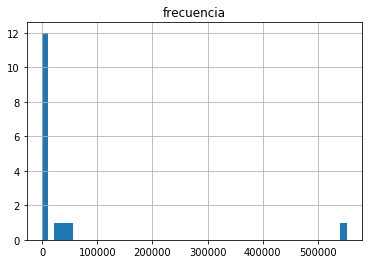

In [21]:
dist_por_tipo = tipos_delitos_CDMX.hist(bins = 50 ) #buscamos la distribución

In [18]:
dist_por_tipo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1166c1f60>]],
      dtype=object)

In [22]:
tipos_delitos_CDMX['Categoría de delito'].unique()

array(['DELITO DE BAJO IMPACTO', 'HECHO NO DELICTIVO', 'HOMICIDIO DOLOSO',
       'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
       'ROBO A CASA HABITACIÓN CON VIOLENCIA',
       'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
       'ROBO A NEGOCIO CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
       'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
       'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
       'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA',
       'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA', 'SECUESTRO', 'VIOLACIÓN'],
      dtype=object)

In [23]:
len(tipos_delitos_CDMX['Categoría de delito'].unique())

16

In [24]:
#contar los delitos más frecuentes
tipos_delitos_CDMX = tipos_delitos_CDMX.sort_values(by = ['frecuencia'], ascending = False)

In [25]:
tipos_delitos_CDMX

,Categoría de delito,frecuencia
0,DELITO DE BAJO IMPACTO,551984
1,HECHO NO DELICTIVO,51034
13,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,36920
11,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,26234
6,ROBO A NEGOCIO CON VIOLENCIA,9111
3,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,6102
10,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,5936
9,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,3909
2,HOMICIDIO DOLOSO,3848
7,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN ...,2350


In [26]:
len(carpetas_investigacion.Delito.unique())

260

In [27]:
carpetas_investigacion.Delito.unique()

array(['DENUNCIA DE HECHOS',
       'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA',
       'LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION',
       'ABUSO DE AUTORIDAD', 'DISPAROS DE ARMA DE FUEGO',
       'ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA', 'ABUSO SEXUAL',
       'LESIONES INTENCIONALES POR ARMA DE FUEGO',
       'DAÑO EN PROPIEDAD AJENA INTENCIONAL', 'HOMICIDIO POR ARMA BLANCA',
       'PERDIDA DE LA VIDA POR OTRAS CAUSAS',
       'LESIONES IMPRUDENCIALES POR TRANSITO VEHICULAR',
       'DELITOS AMBIENTALES', 'ROBO A NEGOCIO CON VIOLENCIA',
       'ROBO A NEGOCIO SIN VIOLENCIA',
       'FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO',
       'DAÑO EN PROPIEDAD AJENA IMPRUDENCIAL POR TRÁNSITO VEHICULAR A AUTOMOVIL',
       'AMENAZAS', 'EXTORSION', 'ROBO A CASA HABITACION SIN VIOLENCIA',
       'USO DE DOCUMENTO FALSO',
       'ROBO A PASAJERO A BORDO DE TAXI SIN VIOLENCIA',
       'VIOLENCIA FAMILIAR', 'ROBO DE MOTOCICLETA SIN VIOLENC

In [28]:
delitos_CDMX = carpetas_investigacion.groupby('Delito', as_index = False).count()

In [29]:
delitos_CDMX.head(5) #aqui se nota que tambien faltan datos de alcaldía, calles,colonia, latitud y longitud


,Delito,Año,Mes,Alcaldía,Categoría de delito,Agencia,Unidad de investigación,Fecha inicio,Fiscalía,Calle1,Calle2,Colonia,Latitud,Longitud,Mes y año,Geopoint
0,ABANDONO DE PERSONA,2431,2431,2421,2431,2431,2431,2431,2431,2426,431,2256,2255,2255,2431,2255
1,ABORTO,325,325,324,325,325,325,325,325,322,161,198,198,198,325,198
2,ABUSO DE AUTORIDAD,4527,4527,4497,4527,4527,4527,4527,4527,4508,1745,4079,4085,4085,4527,4085
3,ABUSO DE CONFIANZA,11369,11369,11358,11369,11369,11369,11369,11369,11346,3117,11182,11192,11192,11369,11192
4,ABUSO SEXUAL,6350,6350,6327,6350,6350,6350,6350,6350,6297,1983,5573,5704,5704,6350,5704


In [30]:
delitos_CDMX = delitos_CDMX.drop(columns = ['Mes', 'Alcaldía','Categoría de delito', 'Agencia',
       'Unidad de investigación', 'Fecha inicio', 'Fiscalía', 'Calle1',
       'Calle2', 'Colonia', 'Latitud', 'Longitud', 'Mes y año', 'Geopoint'])
delitos_CDMX.columns = ['Delito', 'frecuencia']

In [31]:
#ordenado por Delito (diferente a categoria de delito)
delitos_CDMX = delitos_CDMX.sort_values(by = ['frecuencia'], ascending = False)
delitos_CDMX.head(10)

,Delito,frecuencia
259,VIOLENCIA FAMILIAR,58947
209,ROBO DE OBJETOS,46997
145,ROBO A NEGOCIO SIN VIOLENCIA,44246
38,DENUNCIA DE HECHOS,43736
61,FRAUDE,38850
6,AMENAZAS,31563
182,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,25775
191,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,22915
198,ROBO DE ACCESORIOS DE AUTO,21769
211,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,21137


### Alcaldias con más y menos delitos

In [32]:
alcaldias = carpetas_investigacion[['Alcaldía','Delito']]

In [33]:
alcaldias = alcaldias.groupby('Alcaldía', as_index = False).count()

In [34]:
alcaldias.head(5)

,Alcaldía,Delito
0,ABALA,1
1,ABASOLO,2
2,ACAMBAY,3
3,ACAPULCO DE JUAREZ,35
4,ACATZINGO,2


In [36]:
lista_alcaldias = carpetas_investigacion.Alcaldía.unique().tolist() #creamos una lista con las alcaldias 

In [37]:
alcaldias = alcaldias.sort_values(by=['Delito'], ascending = True)

In [38]:
alcaldias.head(10) #las que menos (se puede observar una inconsistencia en el nombre de alcaldia del registro 143)

,Alcaldía,Delito
0,ABALA,1
143,G?EMEZ,1
144,GENERAL ESCOBEDO,1
302,SAN JUAN COTZOCON,1
301,SAN JUAN BAUTISTA TUXTEPEC,1
300,SAN JOSE DEL RINCON,1
299,SAN GREGORIO ATZOMPA,1
297,SAN FERNANDO,1
150,GUASAVE,1
151,GUAYMAS,1


In [39]:
alcaldias = alcaldias.sort_values(by=['Delito'], ascending = False)

In [40]:
alcaldias.head(10) #las que mas

,Alcaldía,Delito
112,CUAUHTEMOC,114987
183,IZTAPALAPA,103507
153,GUSTAVO A MADERO,69446
57,BENITO JUAREZ,61590
107,COYOACAN,47645
235,MIGUEL HIDALGO,46686
21,ALVARO OBREGON,44906
382,TLALPAN,40187
411,VENUSTIANO CARRANZA,40059
53,AZCAPOTZALCO,34879


In [41]:
len(lista_alcaldias) #WOW no todos los datos son de la CDMX

450

## ALCALDIAS CDMX

In [42]:
lista_alcaldias_CDMX = ['CUAUHTEMOC',
 'ALVARO OBREGON',
 'MIGUEL HIDALGO',
 'IZTAPALAPA',
 'BENITO JUAREZ',
 'XOCHIMILCO',
 'VENUSTIANO CARRANZA',
 'TLAHUAC',
 'COYOACAN',
 'GUSTAVO A MADERO',
 'AZCAPOTZALCO','IZTACALCO','CUAJIMALPA DE MORELOS',
 'TLALPAN',
 'LA MAGDALENA CONTRERAS',
 'MILPA ALTA']


In [45]:
#tablas auxiliares para extraer la informacion de las colonias
colonias = carpetas_investigacion[['Alcaldía','Colonia','Delito']]
colonias = colonias.groupby(['Alcaldía','Colonia'], as_index = False).count()

In [46]:
A = []
for i in range(len(lista_alcaldias_CDMX)):
    tmp = colonias[colonias['Alcaldía'] == lista_alcaldias_CDMX[i]]
    tmp = tmp.sort_values(by = ['Delito'], ascending = False)
    registro = (lista_alcaldias_CDMX[i],tmp.iloc[0][1], tmp.iloc[1][1],tmp.iloc[2][1])
    A.append(registro)

In [47]:
A #contiene los datos de las tres colonias en las que hay mas delitos con su respectiva alcaldia

[('CUAUHTEMOC', 'CENTRO', 'DOCTORES', 'ROMA NORTE'),
 ('ALVARO OBREGON', 'JARDINES DEL PEDREGAL', 'SAN ANGEL', 'ZEDEC SANTA FE'),
 ('MIGUEL HIDALGO', 'POLANCO', 'ANAHUAC', 'TACUBA'),
 ('IZTAPALAPA',
  'CENTRAL DE ABASTO',
  'LOMAS DE SAN LORENZO',
  'DESARROLLO URBANO QUETZALCOATL'),
 ('BENITO JUAREZ', 'DEL VALLE CENTRO', 'NARVARTE', 'PORTALES SUR'),
 ('XOCHIMILCO',
  'SAN GREGORIO ATLAPULCO',
  'SANTIAGO TEPALCATLALPAN',
  'SANTA CRUZ ACALPIXCA - PUEBLO'),
 ('VENUSTIANO CARRANZA',
  'JARDÍN BALBUENA',
  'MOCTEZUMA 2A SECCIÓN',
  'ZONA CENTRO'),
 ('TLAHUAC', 'DEL MAR', 'MIGUEL HIDALGO', 'SANTA ANA PONIENTE'),
 ('COYOACAN', 'PEDREGAL DE SANTO DOMINGO', 'DEL CARMEN', 'AJUSCO'),
 ('GUSTAVO A MADERO',
  'LINDAVISTA',
  'GUADALUPE TEPEYAC',
  'SAN FELIPE DE JESÚS'),
 ('AZCAPOTZALCO',
  'EL ROSARIO',
  'INDUSTRIAL VALLEJO',
  'CENTRO DE AZCAPOTZALCO'),
 ('IZTACALCO', 'AGRÍCOLA ORIENTAL', 'AGRÍCOLA PANTITLAN', 'GRANJAS MÉXICO'),
 ('CUAJIMALPA DE MORELOS',
  'LOMAS DE SANTA FE',
  'CUAJIMALPA'

In [48]:
#veamos como se distribuye el numero de delitos respecto a las alcaldias
alcaldias_CDMX = alcaldias[alcaldias['Alcaldía'].isin(lista_alcaldias_CDMX)] 

In [49]:
alcaldias_CDMX

,Alcaldía,Delito
112,CUAUHTEMOC,114987
183,IZTAPALAPA,103507
153,GUSTAVO A MADERO,69446
57,BENITO JUAREZ,61590
107,COYOACAN,47645
235,MIGUEL HIDALGO,46686
21,ALVARO OBREGON,44906
382,TLALPAN,40187
411,VENUSTIANO CARRANZA,40059
53,AZCAPOTZALCO,34879


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116a7fb38>]],
      dtype=object)

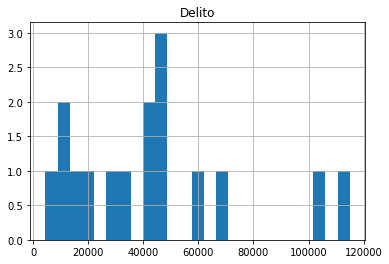

In [50]:
alcaldias_CDMX.hist(bins = 25, column = 'Delito')

In [51]:
alcaldias_CDMX.describe()

,Delito
count,16.000000
mean,43461.312500
std,31674.753395
min,4469.000000
25%,19963.750000
50%,40123.000000
75%,51131.250000
max,114987.000000


In [52]:
alcaldias_CDMX['indice'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

/Users/ISIS/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116f5eda0>]],
      dtype=object)

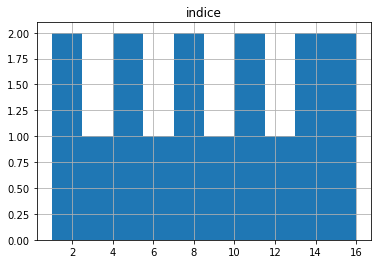

In [53]:
alcaldias_CDMX.hist(column = 'indice')

## Delitos a la alza y a la baja

#### Crearemos una función cuyo argumento será un delito y nos permitirá ver un gráfico con su frecuencia a lo largo del 2018

In [56]:
def historico_delito_2018(delito):
    aux = carpetas_investigacion[(carpetas_investigacion.Delito == delito)&(carpetas_investigacion.Año == 2018)&
                                (carpetas_investigacion.Alcaldía.isin(lista_alcaldias_CDMX))] #solo en la CDMX
    #Extraer el mes de la columna Año y mes
    aux['Mes'] = aux['Mes y año'].apply(lambda x: x[5:]).astype(int)
    aux = aux[['Mes','Delito']]
    aux_2 = aux.groupby('Mes', as_index = False).count()
    aux_2.columns = ['Mes', delito]
    return aux_2.plot(x = 'Mes',y = delito, kind = 'line', title = 'Número de ocurrencias durante 2018')


/Users/ISIS/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


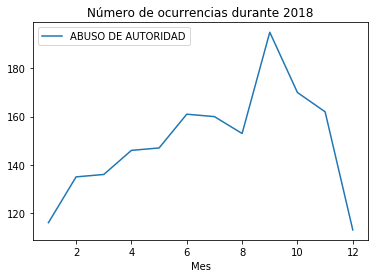

In [57]:
#EJEMPLO, de esta manera podemos ver si esta a la alza o a la baja en la CDMX durante el año 2018
historico_delito_2018('ABUSO DE AUTORIDAD')